L’analyse discriminante est une appellation désignant
plusieurs méthodes de classification dont le fonction-
nement est similaire, en particulier l’analyse discrimi-
nante linéaire (ADL), quadratique (ADQ) ou bien en-
core la classification bayésienne naïve et les classifieurs euclidiens. Cependant, ces méthodes de classification re-
posent sur l’hypothèse que les données sont issues d’une
distribution normale, bien qu’il est possible qu’elles
puissent fonctionner sur des données non issues d’une
telle distribution. Afin de vérifier la normalité des don-
nées, nous avons effectué un test de Kolmogorov-Smirnov. A
un niveau de confiance α = 0.05, l’hypothèse nulle de
normalité est rejetée en raison d’une P-valeur bien trop
faible pour chacune des variables : l’hypothèse ne tient
pas. Nous avons toutefois décidé d’utiliser cette tech-
nique, car il est possible qu’elle donne de bons résultats
mêmes pour des données ne respectant pas cette hypo-
thèse. Il est donc bien entendu possible que les résultats
ne soient pas probants.

In [1]:
!git clone https://github.com/phuockhanhle/SY09_pokemon.git

Cloning into 'SY09_pokemon'...
remote: Enumerating objects: 84, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 84 (delta 21), reused 65 (delta 9), pack-reused 0
Unpacking objects: 100% (84/84), done.


In [1]:
%cd SY09_pokemon

/content/SY09_pokemon


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [39]:
df = pd.read_csv("presenation/Original.csv")
from presenation.traitement import onehotencoding
from presenation.traitement import Differ
df_avecDiff = onehotencoding(df)
df_avecDiff = Differ(df_avecDiff)
X_avecDiff = df_avecDiff.drop(columns=['winner'])
varQuan_avecDiff = df_avecDiff.iloc[:,-6:]
df_avecDiff.loc[df_avecDiff['winner']=='t','winner']=1
df_avecDiff.loc[df_avecDiff['winner']=='f','winner']=0
y = df_avecDiff['winner']

/content/SY09_pokemon/presenation/traitement.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dif'+str(X.columns[i])[2:]] = X.iloc[:,i] - X.iloc[:,i+6]


In [0]:
df = pd.read_csv("presenation/Original.csv")
df_sansDiff = onehotencoding(df)
X_sansDiff = df_sansDiff.drop(columns=['winner'])
df_sansDiff.loc[df_sansDiff['winner']=='t','winner']=1
df_sansDiff.loc[df_sansDiff['winner']=='f','winner']=0
y = df_sansDiff['winner']
varQuan_sansDiff = X_sansDiff.iloc[:,0:13]
varQuan_sansDiff = varQuan_sansDiff.drop(columns=['p1_legen'])

*test normalite*

In [5]:
!pip install pingouin

In [6]:
from scipy.stats import shapiro,kstest
from pingouin import multivariate_normality as mn
shapiro(X_avecDiff['dif_hp'])

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9693375825881958, 0.0)

on conclure que la distribution de variable de X_avecDiff n'est pas normalite

In [71]:
for i in varQuan_avecDiff.columns:
  print(i,kstest(varQuan_avecDiff[i],'norm'))

dif_hp KstestResult(statistic=0.46685010196836985, pvalue=0.0)
dif_atk KstestResult(statistic=0.4769301019683699, pvalue=0.0)
dif_def KstestResult(statistic=0.4746901019683699, pvalue=0.0)
dif_spatk KstestResult(statistic=0.4778701019683699, pvalue=0.0)
dif_spdef KstestResult(statistic=0.4739901019683699, pvalue=0.0)
dif_sp KstestResult(statistic=0.4745501019683699, pvalue=0.0)


In [72]:
for i in varQuan_sansDiff.columns:
  print(i,kstest(varQuan_sansDiff[i],'norm'))

p1_hp KstestResult(statistic=0.9988, pvalue=0.0)
p1_atk KstestResult(statistic=0.9999997133484281, pvalue=0.0)
p1_def KstestResult(statistic=0.9999997133484281, pvalue=0.0)
p1_spatk KstestResult(statistic=1.0, pvalue=0.0)
p1_spdef KstestResult(statistic=1.0, pvalue=0.0)
p1_sp KstestResult(statistic=0.9999997133484281, pvalue=0.0)
p2_hp KstestResult(statistic=0.99872, pvalue=0.0)
p2_atk KstestResult(statistic=0.9999997133484281, pvalue=0.0)
p2_def KstestResult(statistic=0.9999997133484281, pvalue=0.0)
p2_spatk KstestResult(statistic=1.0, pvalue=0.0)
p2_spdef KstestResult(statistic=1.0, pvalue=0.0)
p2_sp KstestResult(statistic=0.9999997133484281, pvalue=0.0)


In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
models = [
  (LinearDiscriminantAnalysis, "LDA"),
  (QuadraticDiscriminantAnalysis, "QDA"),
  (GaussianNB, "NB"),
]
def validation_errors(X,y, models):
  for model, name in models:
    for acc in cross_val_score(model(), X, y, cv=10):
      yield name, acc

In [0]:
from sklearn.model_selection import cross_val_score,train_test_split

In [44]:
resSans = pd.DataFrame(validation_errors(X_sansDiff,list(y), models), columns=["Model","Acc"])

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminan

In [45]:
resAvec = pd.DataFrame(validation_errors(X_avecDiff,list(y), models), columns=["Model","Acc"])

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminan

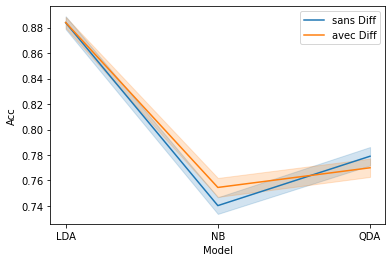

In [48]:
sns.lineplot(x="Model", y="Acc", data=resSans, ci="sd",label='sans Diff')
sns.lineplot(x="Model", y="Acc", data=resAvec, ci="sd",label='avec Diff')


In [0]:
from sklearn.metrics import f1_score,accuracy_score

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_sansDiff, y, test_size=0.33, random_state=1)
m = [1,2]
y_train = list(y_train)
y_test = list(y_test)
res = pd.DataFrame({"type_acc":["f1_score","acc"]
                    ,"LDA":m,"QDA":m,"GNB":m})
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train,list(y_train))
res.loc[res["LDA"]==1,"LDA"] = f1_score(y_test,LDA.predict(X_test))
res.loc[res["LDA"]==2,"LDA"] = accuracy_score(y_test,LDA.predict(X_test))

In [64]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train,y_train)
res.loc[res["QDA"]==1,"QDA"] = f1_score(y_test,QDA.predict(X_test))
res.loc[res["QDA"]==2,"QDA"] = accuracy_score(y_test,QDA.predict(X_test))

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [0]:
  GNB = GaussianNB()
  GNB.fit(X_train,y_train)
  res.loc[res["GNB"]==1,"GNB"] = f1_score(y_test,GNB.predict(X_test))
  res.loc[res["GNB"]==2,"GNB"] = accuracy_score(y_test,GNB.predict(X_test))

In [66]:
res

,type_acc,LDA,QDA,GNB
0,f1_score,0.878798,0.767383,0.729346
1,acc,0.885152,0.776970,0.741091


le resultat coherant avec accuracy de cross-validation

le resultat n'est pas tres bonne en comparant avec des autres methode. On peut expliquer la bon resultat de LDA est que ecart-type de chaque variable semble egal 

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_avecDiff, y, test_size=0.33, random_state=1)
m = [1,2]
y_train = list(y_train)
y_test = list(y_test)
res = pd.DataFrame({"type_acc":["f1_score","acc"]
                    ,"LDA":m,"QDA":m,"GNB":m})
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train,list(y_train))
res.loc[res["LDA"]==1,"LDA"] = f1_score(y_test,LDA.predict(X_test))
res.loc[res["LDA"]==2,"LDA"] = accuracy_score(y_test,LDA.predict(X_test))
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train,y_train)
res.loc[res["QDA"]==1,"QDA"] = f1_score(y_test,QDA.predict(X_test))
res.loc[res["QDA"]==2,"QDA"] = accuracy_score(y_test,QDA.predict(X_test))
GNB = GaussianNB()
GNB.fit(X_train,y_train)
res.loc[res["GNB"]==1,"GNB"] = f1_score(y_test,GNB.predict(X_test))
res.loc[res["GNB"]==2,"GNB"] = accuracy_score(y_test,GNB.predict(X_test))

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [70]:
res

,type_acc,LDA,QDA,GNB
0,f1_score,0.878155,0.759877,0.745934
1,acc,0.884424,0.769030,0.756667


en LDA, le performance de deux representation est meme,pour tant, pour QDA et GNB le performance de avec_diff est mieux, le resultat est que dans Kolmogorov–Smirnov test, le stat  Kolmogorov–Smirnov statistic des variables de representation avec_diff est inferieur que celle de representation de sans_diff, cela indique que des variables quantitatives de representation avec diff est plus normal

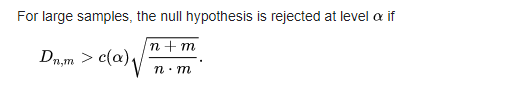

In [0]:
ana = pd.read_csv("output/moyen_stdVar.csv",sep=";") 

In [0]:
ana

,vars,moyen_empirique,escart_type
0,dif_hp,-0.033020,35.563920
1,dif_atk,0.085940,46.158170
2,dif_def,0.099940,44.721930
3,dif_spatk,0.229680,46.182220
4,dif_spdef,0.058580,39.448160
5,dif_sp,-0.064800,41.340770
6,nbrContre,539.741800,377.985300
7,probWinParType,0.537683,0.184388
